# Process Tomography of the CZ gates

In [4]:
import numpy as np
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import *

qvm = QVMConnection()

from grove.tomography.process_tomography import do_process_tomography
from grove.tomography.utils import notebook_mode
from pyquil.api import QPUConnection, get_devices
#from mock import MagicMock
import json
from __future__ import print_function
import matplotlib.pyplot as plt

#Fake QPU
acorn = get_devices(as_dict=True)['19Q-Acorn']
qpu = QPUConnection(acorn)

#To do
#all_qubits = np.array([[0,5],[0,6],[1,6],[1,7],[2,7],[2,8],[4,9],[5,10],[6,11],
            #          [7,12],[8,13],[9,14],[10,15], [10,16],[11,16],[11,17],[12,17],
            #          [12,18],[13,18],[13,19],[14,19]])
all_qubits = np.array([[11,6],[11,16],[11,17]])


/Users/lisatse/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)



  0%|          | 0/4 [00:00<?, ?it/s]

Running process tomography on the QPU...



100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

job jiNVjOPpyrtcizFG is currently running



 75%|███████▌  | 3/4 [00:04<00:01,  1.41s/it]

job ZyLaTikbxtZXddBJ is currently running



100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

  0%|          | 1/256 [00:00<00:50,  5.06it/s]/Users/lisatse/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)

 59%|█████▊    | 150/256 [00:38<00:27,  3.89it/s]


100%|██████████| 256/256 [01:07<00:00,  3.77it/s]

 19%|█▉        | 48/256 [00:25<01:50,  1.88it/s]


 79%|███████▉  | 203/256 [01:41<00:26,  2.00it/s]


100%|██████████| 256/256 [02:08<00:00,  2.00it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Process tomography completed.
Running process tomography on the QVM for reference...



100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

 57%|█████▋    | 147/256 [00:49<00:36,  2.96it/s]


100%|██████████| 256/256 [01:12<00:00,  3.55it/s]

 18%|█▊        | 45/256 [00:24<01:55,  1.83it/s]


 78%|███████▊  | 200/256 [01:41<00:28,  1.96it/s]


100%|██████████| 256/256 [02:13<00:00,  1.92it/s]


Process tomography completed.
[[ 9.99996986e-01  1.68218299e-06  5.54507883e-07 -1.06700720e-06
   2.64197544e-06 -1.23680564e-06 -5.58585774e-07 -9.88798410e-07
  -1.69502231e-06  1.83860863e-06  7.57940172e-07 -1.02237837e-06
   3.77678875e-06 -4.84175471e-06  3.71276036e-06  1.97213578e-06]
 [ 1.15038509e-01  4.21134473e-02 -9.35554789e-02  6.74123126e-02
  -1.19370744e-01 -5.32309153e-03 -6.20693401e-01  4.03676547e-02
  -4.59883470e-02 -1.23770753e-01 -1.35013472e-01  1.57602358e-01
  -1.97500927e-01  8.28110164e-01  3.20647172e-01 -4.00459942e-02]
 [ 2.59222158e-01  8.58945811e-02  2.60889178e-01  6.56676951e-02
  -2.98391777e-01 -2.59839516e-01 -1.62835739e-01 -4.84822723e-02
   3.05717822e-01 -5.83904511e-02  1.40501951e-01  1.23616520e-01
  -9.32481055e-02 -1.48323912e-01  7.43115432e-01 -3.55847906e-02]
 [ 5.39075812e-02  3.43013897e-02  4.37371335e-02  8.93790231e-01
  -3.29967055e-02  2.28586727e-01 -1.72536383e-01  3.86421228e-02
   7.90891963e-02 -1.07628832e-02  4.161158


  0%|          | 0/4 [00:00<?, ?it/s]

Running process tomography on the QPU...



100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

job RuMMTqOlfNXiloye is currently running



 25%|██▌       | 1/4 [00:02<00:08,  2.69s/it]

job RfhzTQrkTGvhKIoc is currently running



 50%|█████     | 2/4 [00:03<00:03,  1.66s/it]

job uOKWsKIhnNbIIGzs is currently running



100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

 60%|█████▉    | 153/256 [00:50<00:33,  3.05it/s]


100%|██████████| 256/256 [01:22<00:00,  3.11it/s]

 20%|█▉        | 51/256 [00:25<01:42,  2.00it/s]


 80%|████████  | 206/256 [01:40<00:24,  2.06it/s]


100%|██████████| 256/256 [02:05<00:00,  2.04it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Process tomography completed.
Running process tomography on the QVM for reference...



100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

 57%|█████▋    | 147/256 [00:40<00:30,  3.59it/s]


100%|██████████| 256/256 [01:07<00:00,  3.80it/s]

 18%|█▊        | 45/256 [00:24<01:53,  1.86it/s]


 78%|███████▊  | 200/256 [01:40<00:28,  1.99it/s]


100%|██████████| 256/256 [02:04<00:00,  2.05it/s]


Process tomography completed.
[[ 9.99999613e-01  4.25513269e-07 -1.36668340e-06  2.00188792e-06
   1.21187151e-06 -1.89318561e-06  3.80718571e-06 -1.39399512e-06
   2.36474709e-08  8.21899235e-08  2.04622713e-07  2.06353223e-06
   3.34374037e-09  9.26946452e-09  8.68130418e-07  1.32063816e-06]
 [ 1.30846818e-01 -8.99256145e-02  9.22406655e-02  1.04934952e-01
  -9.26372020e-02  2.62300260e-01  7.52655171e-02  4.05496549e-02
   4.81263921e-01 -2.65585096e-01 -1.79999499e-01 -1.07712157e-01
  -6.31729931e-02  8.76721416e-01 -9.31418115e-02 -1.64303388e-02]
 [ 1.57038125e-02  2.40616798e-02  8.63172569e-02 -4.09772443e-02
  -9.45388453e-03 -4.57499712e-01  2.59463878e-01  1.09935938e-01
   1.29080198e-01  2.05496174e-01 -2.97658556e-02 -1.16442255e-01
  -1.21167615e-01  2.27157986e-01  6.32658438e-01 -5.71492473e-02]
 [ 4.82768404e-02 -8.68643667e-02 -1.02613152e-01  9.34052644e-01
  -3.04221955e-02 -1.05771034e-01  3.46878396e-01 -5.10791745e-02
   1.30371575e-02 -2.17183272e-01  5.825005


  0%|          | 0/4 [00:00<?, ?it/s]

Running process tomography on the QPU...



100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

job QNMpIVqbhTWTtMFz is currently queued at position 19. Estimated time until execution: 57.0 seconds.
job QNMpIVqbhTWTtMFz is currently queued at position 14. Estimated time until execution: 42.0 seconds.
job QNMpIVqbhTWTtMFz is currently queued at position 10. Estimated time until execution: 30.0 seconds.
job QNMpIVqbhTWTtMFz is currently queued at position 3. Estimated time until execution: 9.0 seconds.



 25%|██▌       | 1/4 [00:29<01:27, 29.27s/it]

job qaGtTMPegWmrWZQJ is currently running



 50%|█████     | 2/4 [00:29<00:29, 14.92s/it]

job vhdGexXnUIZZPceK is currently queued at position 1. Estimated time until execution: 3.0 seconds.



 75%|███████▌  | 3/4 [00:33<00:11, 11.24s/it]

job HYlXsPlEdeOQtwrl is currently queued at position 0. Estimated time until execution: 0.0 seconds.



100%|██████████| 4/4 [00:35<00:00,  8.94s/it]

 60%|██████    | 154/256 [00:38<00:25,  3.97it/s]


100%|██████████| 256/256 [01:03<00:00,  4.05it/s]

 20%|██        | 52/256 [00:22<01:29,  2.28it/s]


 23%|██▎       | 60/256 [00:26<01:25,  2.30it/s]

job rKOFynPeNaHNoEdw is currently running



 25%|██▌       | 64/256 [00:28<01:25,  2.23it/s]

job AyTliSOSgUVYKCZp is currently running



 25%|██▌       | 65/256 [00:29<01:25,  2.22it/s]

job DlJQxUZliyHJIpFZ is currently running



 26%|██▌       | 66/256 [00:30<01:26,  2.20it/s]

job mlZbEqrtHcSTdrTo is currently running



 26%|██▌       | 67/256 [00:30<01:26,  2.19it/s]

job thTbzxGbvAVRcIFu is currently running



 27%|██▋       | 68/256 [00:31<01:26,  2.17it/s]

job TQiLjXlulDdMxZpG is currently running



 27%|██▋       | 70/256 [00:32<01:27,  2.13it/s]

job YdhGpzNAbMAMUzOi is currently running



 29%|██▉       | 74/256 [00:35<01:26,  2.09it/s]

job KJGwMlimvuKncwzl is currently running



 29%|██▉       | 75/256 [00:35<01:26,  2.09it/s]

job GeWOjRCoBdirAeiu is currently running



 31%|███▏      | 80/256 [00:39<01:26,  2.03it/s]

job RqXRYQhPNXNYubBY is currently running



 32%|███▏      | 82/256 [00:40<01:25,  2.03it/s]

job YqBIegETGYsHMtYe is currently running



 33%|███▎      | 84/256 [00:41<01:25,  2.01it/s]

job KsRWxyeVeEIRBiBO is currently running



 33%|███▎      | 85/256 [00:42<01:25,  2.00it/s]

job HuSAcQUpiAIeSfBx is currently running



 34%|███▎      | 86/256 [00:43<01:25,  2.00it/s]

job SRGqMdqnxMkAunqL is currently running



 34%|███▍      | 87/256 [00:43<01:24,  2.00it/s]

job uKbcSzDlsDFKYuNF is currently running



 35%|███▌      | 90/256 [00:45<01:23,  1.98it/s]

job yvHbWTNHvFQhJIQi is currently running



 36%|███▋      | 93/256 [00:47<01:23,  1.95it/s]

job iblmrbwRyJQAKpBr is currently running



 37%|███▋      | 94/256 [00:48<01:23,  1.94it/s]

job szXkGMGEPYyOzBvZ is currently running



 37%|███▋      | 95/256 [00:49<01:23,  1.94it/s]

job BZyOLwneKGsTLiet is currently running



 38%|███▊      | 96/256 [00:49<01:22,  1.93it/s]

job CiQLxDrigywdqwPB is currently running



 38%|███▊      | 97/256 [00:50<01:22,  1.93it/s]

job COOmtjREMNmeWkHj is currently running



 39%|███▊      | 99/256 [00:51<01:21,  1.92it/s]

job OHOuPgJXqYUDtFYq is currently running



 45%|████▌     | 116/256 [01:02<01:15,  1.84it/s]

job FNAZEhcNDwOBhMOp is currently running



 46%|████▌     | 117/256 [01:03<01:15,  1.84it/s]

job DCRgRuvNdEBzydkU is currently running



 46%|████▋     | 119/256 [01:04<01:14,  1.84it/s]

job HQKRADICELLqWjhK is currently running



 47%|████▋     | 120/256 [01:05<01:14,  1.83it/s]

job EyxCFvSdEWcKvCcF is currently running



 47%|████▋     | 121/256 [01:06<01:13,  1.83it/s]

job kQSMmYmrkrDugQTp is currently running



 48%|████▊     | 122/256 [01:06<01:13,  1.83it/s]

job UPFfYfdxqZgemJwT is currently running



 48%|████▊     | 123/256 [01:07<01:13,  1.82it/s]

job fvQyPsEJlPDiVnva is currently running



 49%|████▉     | 125/256 [01:08<01:12,  1.82it/s]

job RxVKTeWTlmaBifpq is currently running



 50%|█████     | 129/256 [01:11<01:10,  1.81it/s]

job smCBKUIAigrxzyEs is currently running



 51%|█████     | 130/256 [01:12<01:09,  1.80it/s]

job AQdfBowFWEisZhyH is currently running



 51%|█████     | 131/256 [01:12<01:09,  1.80it/s]

job EYyOgBjrFiQdslmt is currently running



 52%|█████▏    | 132/256 [01:13<01:08,  1.80it/s]

job xfvQMOVYekGdgwXb is currently running



 52%|█████▏    | 133/256 [01:14<01:08,  1.79it/s]

job MapGhSpPSumVUHir is currently running



 52%|█████▏    | 134/256 [01:14<01:08,  1.79it/s]

job tKNelpDOuqDBRFPT is currently running



 53%|█████▎    | 135/256 [01:15<01:07,  1.79it/s]

job HKhAOIcYmAIGkfTI is currently running



 54%|█████▎    | 137/256 [01:16<01:06,  1.79it/s]

job ngsndLIUMeLaHpfJ is currently running



 54%|█████▍    | 138/256 [01:17<01:06,  1.78it/s]

job RayEQQwSdecmacxI is currently running



 55%|█████▍    | 140/256 [01:18<01:05,  1.78it/s]

job uLqQZwuRstEaqnNy is currently running



 55%|█████▌    | 142/256 [01:20<01:04,  1.77it/s]

job rmkzpQvkuyHvdJbN is currently running



 56%|█████▌    | 143/256 [01:20<01:03,  1.77it/s]

job ntipyNazkPNweefz is currently running



 56%|█████▋    | 144/256 [01:21<01:03,  1.77it/s]

job KfvAfvKblRYJJdyQ is currently running



 57%|█████▋    | 145/256 [01:22<01:02,  1.77it/s]

job ZKPRMbOFiDAxGObx is currently running



 58%|█████▊    | 148/256 [01:23<01:01,  1.77it/s]

job rTfrfSMYzGZrldsT is currently running



 59%|█████▊    | 150/256 [01:25<01:00,  1.76it/s]

job xfbdFRChdzNToBhS is currently running



 59%|█████▉    | 151/256 [01:25<00:59,  1.76it/s]

job CMyLAegxdnOIuhTQ is currently running



 59%|█████▉    | 152/256 [01:26<00:59,  1.76it/s]

job WfpOuaLLaEmWrbLG is currently running



 60%|█████▉    | 153/256 [01:27<00:58,  1.76it/s]

job jiZDivXlJsoCCFgM is currently running



 60%|██████    | 154/256 [01:27<00:58,  1.75it/s]

job IXBOqQWWjZPaeKBh is currently running



 61%|██████    | 155/256 [01:28<00:57,  1.75it/s]

job nvXHsajClbGxwuwo is currently running



 61%|██████    | 156/256 [01:29<00:57,  1.75it/s]

job QaEOlzKqrSLOhtsZ is currently running


KeyboardInterrupt: 

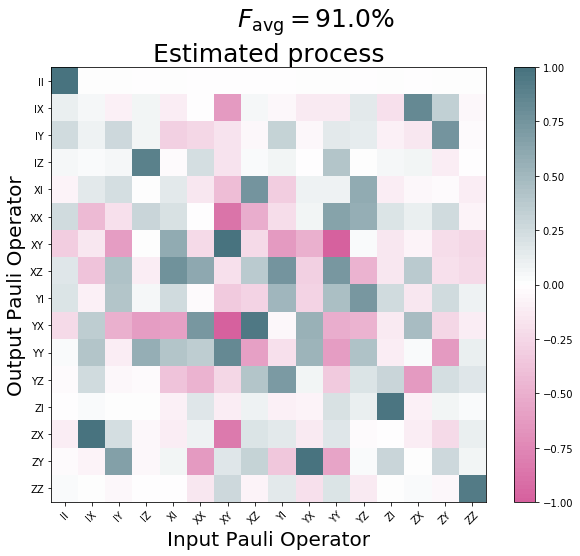

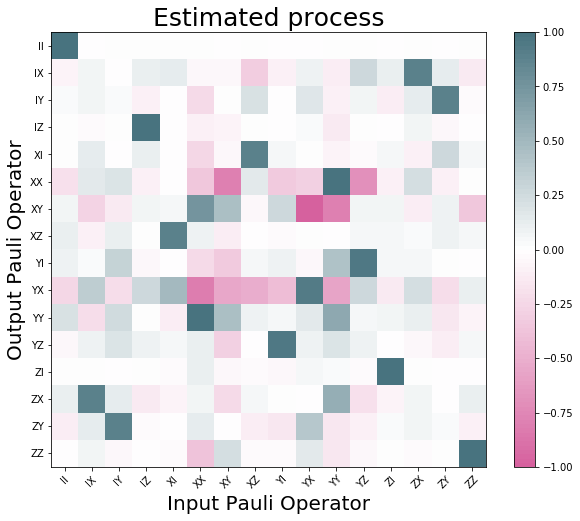

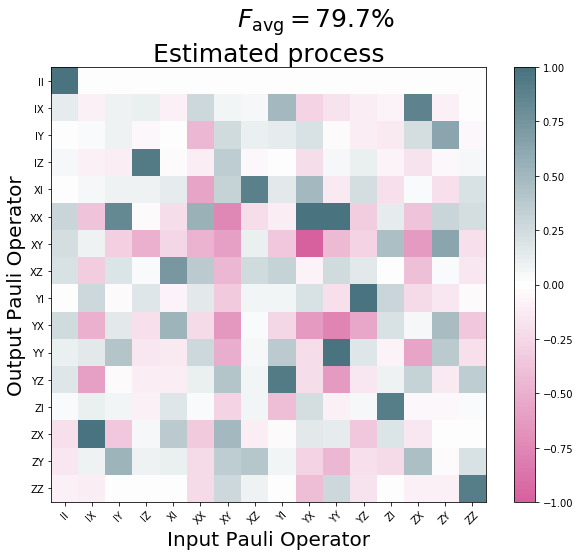

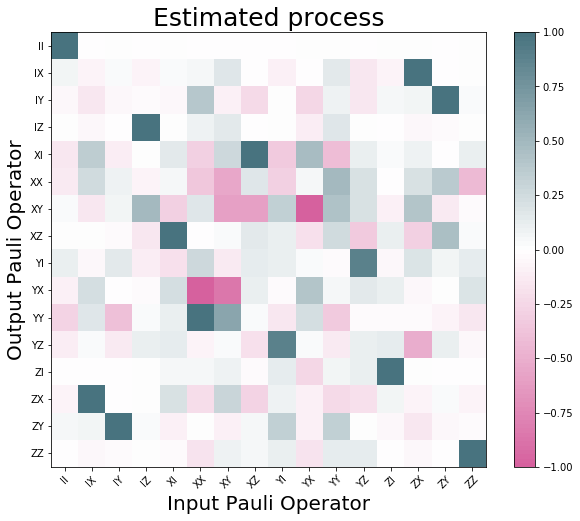

In [5]:
NUM_SAMPLES = 10
dead_qubits = [2,3,15,18]
for qubits in all_qubits:
    if len(np.intersect1d(qubits,dead_qubits))==0:
        qubits = qubits.tolist()
        CZ_PROGRAM = Program([CZ(qubits[0], qubits[1])])

        #Perform process tomography
        print("Running process tomography on the QPU...")
        process_tomography_qpu, _, _ = do_process_tomography(CZ_PROGRAM, NUM_SAMPLES, qpu, qubits)
        print("Process tomography completed.")
        print("Running process tomography on the QVM for reference...")
        process_tomography_qvm, _, _ = do_process_tomography(CZ_PROGRAM, NUM_SAMPLES, qvm, qubits)
        print("Process tomography completed.")

        print(process_tomography_qpu.r_est)
        print(process_tomography_qvm.r_est)
        process_fidelity = process_tomography_qpu.avg_gate_fidelity(process_tomography_qvm.r_est)


        qpu_plot = process_tomography_qpu.plot()
        qpu_plot.text(0.4, .95, r'$F_{{\rm avg}}={:1.1f}\%$'.format(process_fidelity*100), size=25)
        plt.savefig("process_qpu_%d_%d.eps" %(qubits[0],qubits[1]))
        process_tomography_qvm.plot()
        plt.savefig("process_qvm_%d_%d.eps" %(qubits[0],qubits[1]))